In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot as plt
from sklearn.utils.multiclass import unique_labels


In [2]:
df = pd.read_csv('FinalDataset/All.csv', low_memory=False)

In [3]:
df.shape

(36707, 80)

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df.dtypes

Querylength                          int64
domain_token_count                   int64
path_token_count                     int64
avgdomaintokenlen                  float64
longdomaintokenlen                   int64
avgpathtokenlen                    float64
tld                                  int64
charcompvowels                       int64
charcompace                          int64
ldl_url                              int64
ldl_domain                           int64
ldl_path                             int64
ldl_filename                         int64
ldl_getArg                           int64
dld_url                              int64
dld_domain                           int64
dld_path                             int64
dld_filename                         int64
dld_getArg                           int64
urlLen                               int64
domainlength                         int64
pathLength                           int64
subDirLen                            int64
fileNameLen

In [6]:
df.head(10)

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement
5,0,4,8,5.5,14,6.500000,4,22,10,0,0,0,0,0,0,0,0,0,0,91,25,59,59,2,2,2,0.648352,0.021978,0.08,0.274725,2.36,0.033898,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,78,22,8,13,31,-1,34,14,15,13,-1,0,0,4,0,4,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.666676,0.784493,0.814725,0.755658,0.0,-1.0,Defacement
6,0,4,5,5.5,14,7.800000,4,17,10,0,0,0,0,0,0,0,0,0,0,75,25,43,43,2,2,2,0.573333,0.026667,0.08,0.333333,1.72,0.046512,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,65,22,8,13,18,-1,18,14,18,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.682440,0.784493,0.814725,0.766719,0.0,-1.0,Defacement
7,0,4,7,5.5,14,6.285714,4,16,9,0,0,0,0,0,0,0,0,0,0,82,25,50,50,2,2,2,0.609756,0.024390,0.08,0.304878,2.00,0.040000,0,-1,4,-1,0.6,-1,8,0,0,0,8,-1,62,22,8,13,15,-1,25,14,13,13,-1,0,0,4,0,3,-1,0.097561,0.0,0.0,0.320000,NaN,-1.0,8,3,3,0,0,-1,0.709396,0.784493,0.814725,0.797498,0.0,-1.0,Defacement
8,0,4,6,5.5,14,6.500000,4,16,10,0,0,0,0,0,0,0,0,0,0,76,25,44,44,2,2,2,0.578947,0.026316,0.08,0.328947,1.76,0.045455,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,65,22,8,13,18,-1,19,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.678242,0.784493,0.814725,0.732258,0.0,-1.0,Defacement
9,0,4,5,5.5,14,3.600000,4

In [7]:
df.tail(10)

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
36697,941,3,6,4.333334,9,2.500000,3,106,111,132,0,132,0,132,23,0,23,0,23,980,15,958,958,2,2,944,0.977551,0.963265,62.933334,0.015306,63.866665,0.985386,0,-1,3,-1,0.666667,941,153,0,0,0,153,153,817,13,3,3,794,788,949,9,4,4,0,0,1,3,0,1,1,0.156122,0.0,0.000000,0.160546,0.161222,0.162076,8,2,1,3,2,1,0.568732,0.863489,0.827729,0.567395,0.566750,0.565988,spam
36698,51,3,12,6.666666,16,3.750000,3,18,12,9,0,9,0,7,4,0,4,0,4,133,22,104,104,2,2,85,0.781955,0.639098,3.863636,0.165414,4.727272,0.817308,0,-1,4,-1,0.772727,32,33,0,1,1,31,29,82,20,11,11,36,21,73,16,12,12,16,0,3,3,0,5,5,0.248120,0.0,0.100000,0.340426,0.359551,0.376471,13,2,1,8,7,6,0.745841,0.801139,0.879588,0.772686,0.774343,0.770006,spam
36699,6,3,7,2.666667,4,4.800000,3,11,8,1,0,1,0,1,0,0,0,0,0,57,10,40,40,2,2,11,0.701754,0.192982,1.100000,0.175439,4.000000,0.275000,0,-1,3,-1,0.500000,6,4,0,0,0,4,4,42,8,15,6,9,2,15,4,8,8,0,0,1,4,0,1,1,0.070175,0.0,0.000000,0.181818,0.266667,0.363636,9,2,2,3,2,1,0.783024,0.879588,0.783307,0.918457,0.931745,0.947443,spam
36700,0,3,6,2.666667,4,5.500000,3,11,9,1,0,1,1,0,0,0,0,0,0,55,10,38,38,6,3,2,0.690909,0.036364,0.200000,0.181818,3.800000,0.052632,0,-1,3,-1,0.500000,-1,8,0,4,4,0,-1,37,8,20,2,3,-1,13,4,13,13,-1,0,0,5,0,1,-1,0.145455,0.0,0.142857,0.400000,0.000000,-1.000000,8,2,3,1,0,-1,0.771984,0.879588,0.759561,1.000000,1.000000,-1.000000,spam
36701,0,3,5,4.666666,10,3.000000,3,2,2,1,0,1,1,0,1,0,1,1,0,42,16,19,19,8,3,2,0.452381,0.047619,0.125000,0.380952,1.187500,0.105263,0,-1,3,-1,0.687500,-1,6,0,0,6,0,-1,27,14,4,2,3,-1,8,10,4,4,-1,0,0,3,0,2,-1,0.142857,0.0,0.000000,0.500000,0.000000,-1.000000,6,2,1,1,0,-1,0.799054,0.843750,0.898227,0.814038,1.000000,-1.000000,spam
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,0,3,0,2,0,0,0,0,0,146,26,113,113,2,2,85,0.773973,0.582192,3.269231,0.178082,4.346154,0.752212,0,-1,5,-1,0.500000,23,31,0,4,0,27,3,94,23,46,7,14,24,43,12,11,11,23,0,3,6,0,2,5,0.212329,0.0,0.064516,0.529412,0.627907,0.066667,19,3,11,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,spam
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,0,0,0,0,0,0,0,0,0,147,18,122,122,2,2,2,0.829932,0.013605,0.111111,0.122449,6.777778,0.016393,0,-1,5,-1,0.500000,-1,21,0,0,0,21,-1,101,15,7,6,69,-1,105,8,9,9,-1,0,0,3,0,2,-1,0.142857,0.0,0.000000,0.187500,0.200000,-1.000000,23,3,2,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,spam
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,0,20,0,18,12,0,12,0,12,246,22,217,217,2,2,182,0.882114,0.739837,8.272727,0.089431,9.863636,0.838710,0,-1,7,-1,0.772727,58,57,0,6,0,51,1,156,20,71,3,58,48,118,16,12,12,0,0,1,12,0,9,1,0.231707,0.0,0.073171,0.377778,0.418033,0.029412,26,2,14,8,7,9,0.656807,0.801139

In [8]:
# statistical summary
df.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
count,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36427.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.00000,36707.00000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,3.670700e+04,36707.000000,36707.000000,36707.000000,36707.0,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36697.000000,36697.000000,26577.000000,36704.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,28239.000000,36471.000000,36667.000000,36701.000000
mean,21.908110,2.857439,8.954668,5.401719,9.746016,4.556261,2.857439,14.976517,10.216117,3.363909,0.116517,3.244449,0.182663,2.395129,0.930204,0.007328,0.922876,0.061814,0.560111,92.945297,16.907320,69.05296,69.05296,6.815267,2.449070,34.344539,0.669962,0.236741,2.161321,0.232119,4.671155,inf,0.001389,-0.999619,2.866156,-1.0,0.623347,17.444956,10.474079,0.558395,1.213311,1.239001,6.874765,4.495491,68.165146,14.351323,10.902335,7.531969,29.923965,15.715912,48.241098,8.456725,8.529082,7.734138,2.070831,0.037214,1.297300,3.831885,0.139892,3.121094,1.682785,0.095546,0.037239,0.003768,0.103401,0.037579,-0.475142,9.701882,1.856894,1.727545,3.600049,2.685237,1.903261,0.722350,0.842443,0.677459,0.715834,0.508212,-0.208900
std,94.280669,0.906562,4.278406,1.986858,4.856580,2.839388,0.906562,13.351315,10.845807,13.447289,0.606963,13.445774,1.112706,13.293604,2.692333,0.253727,2.675460,0.591369,2.301820,95.299612,7.648725,95.30716,95.30716,13.215634,0.785388,97.354275,0.159520,0.271793,6.423116,0.130322,6.480310,NaN,0.037249,0.019526,1.518403,0.0,0.161263,93.785703,18.034275,1.720052,4.842470,3.854567,17.343843,16.590541,79.002743,6.779777,15.592792,8.993364,80.159459,78.926758,95.155979,4.401473,3.521190,3.796621,5.361594,0.196213,2.071099,1.824176,0.458507,3.192752,4.229709,0.095776,0.104059,0.271824,0.333624,0.322947,0.600201,5.054621,0.904671,2.719231,4.783213,4.557171,4.512421,0.048820,0.066251,0.450683,0.411712,0.519695,0.891581
min,0.000000,2.000000,0.000000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,4.000000,0.00000,0.00000,1.0000

In [9]:
print(df.groupby('URL_Type_obf_Type').size())

URL_Type_obf_Type
Defacement    7930
benign        7781
malware       6712
phishing      7586
spam          6698
dtype: int64


## Function to clean data

In [10]:
# function loads, cleans and returns panda dataframe
def loadAndCleanData(csvFile):
    pickleDump = '{}.pickle'.format(csvFile)
    if os.path.exists(pickleDump):
        df = pd.read_pickle(pickleDump)
    else:
        df = pd.read_csv(csvFile, low_memory=False)

        df = df.rename(str.strip, axis='columns')

        for col in df.columns:
            indexNames = df[df[col] == 'Infinity'].index
            if not indexNames.empty:
                print('deleting {} rows with Infinity in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
            indexNames = df[df[col]== 'NaN'].index
            if not indexNames.empty:
                print('deleting {} rows with NaN in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
        df['argPathRatio'].astype('float')
        # drop NaN pandas way
        beforeRows = df.shape[0]
        df.dropna(inplace = True)
        print('Dropped {} rows with NaN values'.format(beforeRows - df.shape[0]))
        df.to_pickle(pickleDump)
        
    return df

In [11]:
df1 = loadAndCleanData('FinalDataset/All.csv')

## All variables

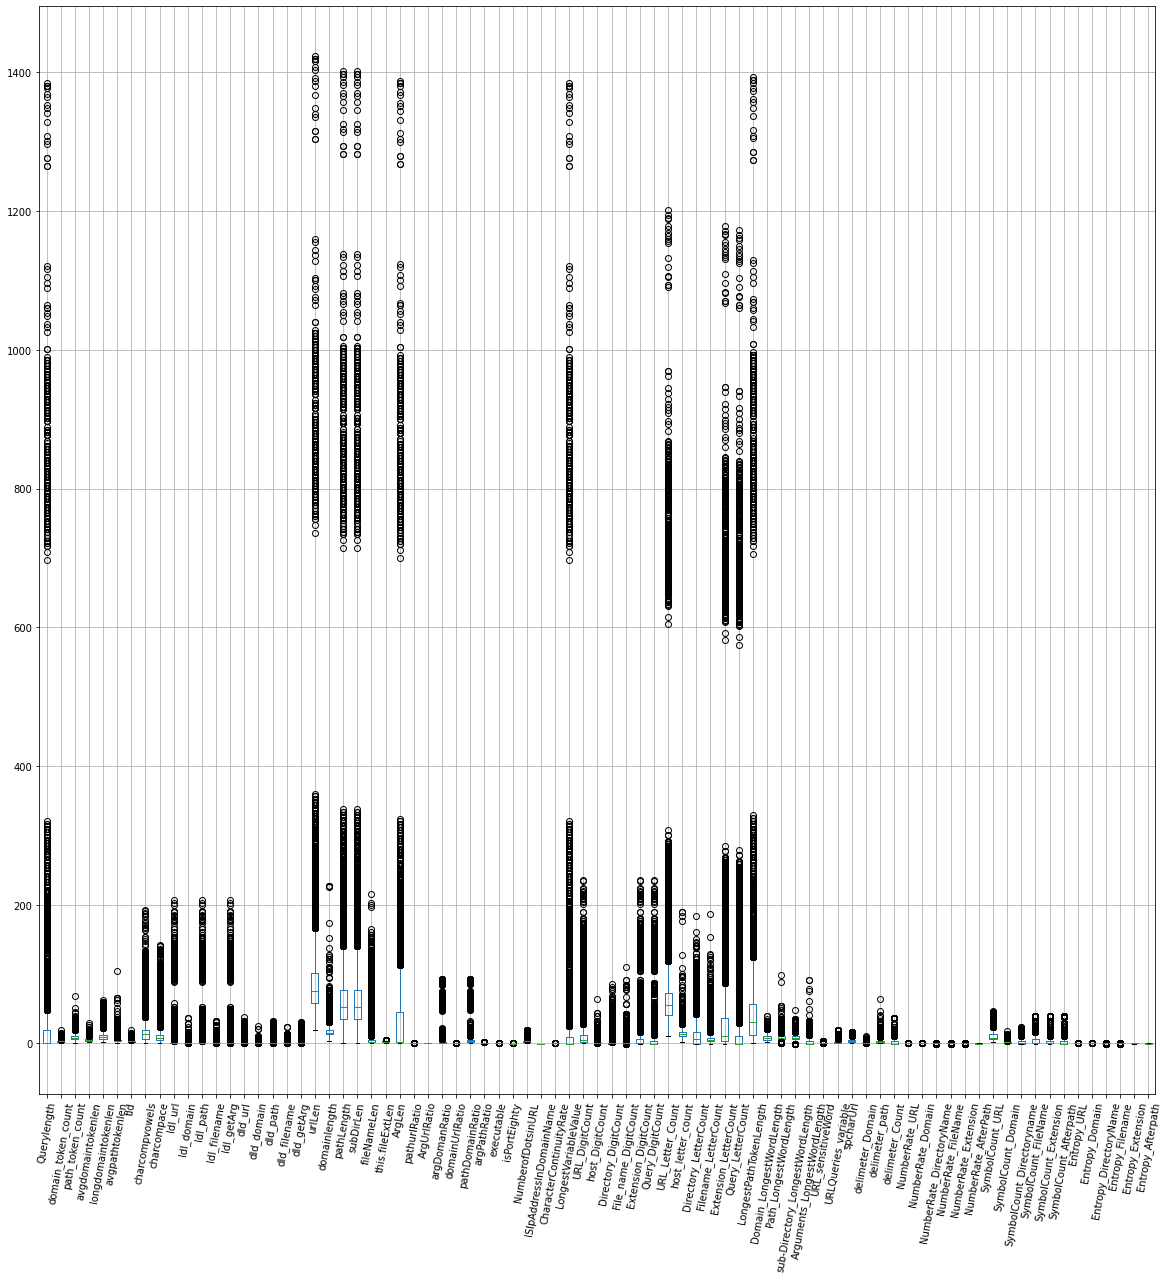

In [12]:
ax1 = df.boxplot(figsize=(20,20))
ax1.tick_params(axis ='x', rotation = 80)

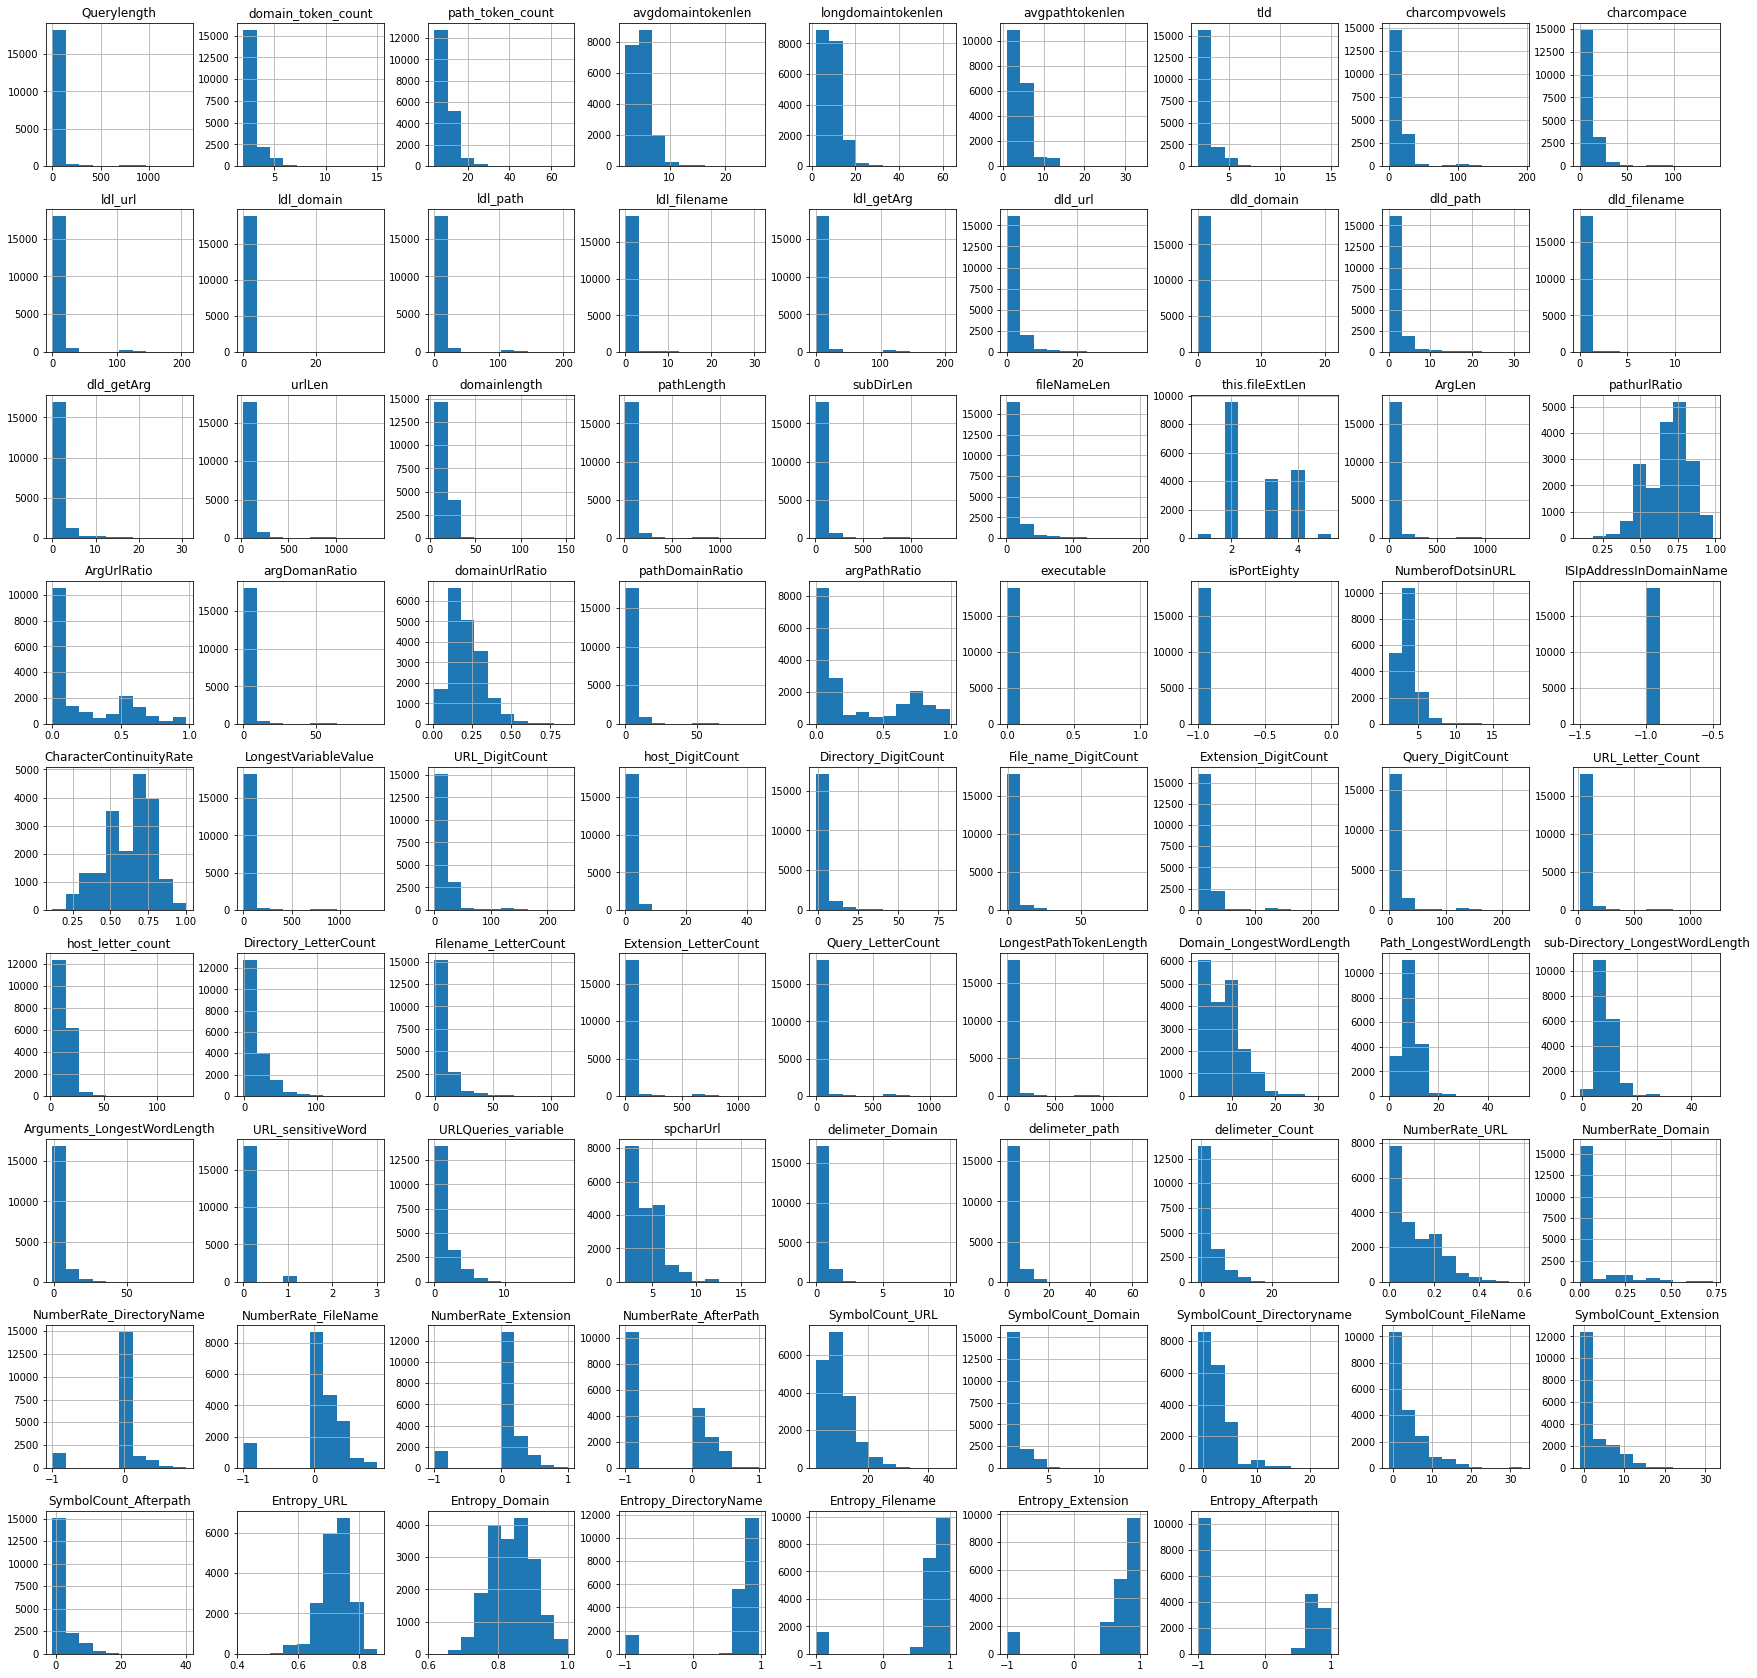

In [13]:
# Histograms of each attribute
df1.hist(figsize=(30, 30))
plt.show()

In [14]:
# Split-out validation dataset
def splitDataset(df):
    array = df.values
    X = array[:,0:79]
    Y = array[:,79]
    validation_size = 0.20
    random_seed = 100
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                    test_size=validation_size, 
                                                                                    random_state=random_seed)
    return X_train, X_validation, Y_train, Y_validation

## Machine Learning Algorithms 

In [15]:
def runExperiments(X_train, Y_train):
    random_seed = 100
    scoring = 'accuracy'
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='auto')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    models.append(('AB', AdaBoostClassifier(n_estimators=100)))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier(n_estimators=10)))


    results = []
    classifiers = []
    accuracies = []
    for classifier, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=None)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        accuracies.append((cv_results.mean(), classifier))
        results.append(cv_results)
        classifiers.append(classifier)
        msg = "%s: %f (%f)" % (classifier, cv_results.mean(), cv_results.std())
        print(msg)
    return results, accuracies, classifiers

In [22]:
# This takes some time
X_train, X_validation, Y_train, Y_validation = splitDataset(df1)
results, accuracies, classifiers = runExperiments(X_train, Y_train)

LR: 0.865525 (0.006051)
LDA: 0.818438 (0.007342)
KNN: 0.908595 (0.006872)
CART: 0.940665 (0.004924)
NB: 0.622784 (0.020285)
SVM: 0.910439 (0.006137)
AB: 0.616538 (0.037306)
DT: 0.939546 (0.005109)
RF: 0.961607 (0.004046)


'LR: 0.865525 (0.006051)\nLDA: 0.818438 (0.007342)\nKNN: 0.908595 (0.006872)\nCART: 0.939151 (0.006336)\nNB: 0.622784 (0.020285)\nSVM: 0.910439 (0.006137)\nAB: 0.616538 (0.037306)\nDT: 0.939084 (0.006057)\nRF: 0.962200 (0.002409)'

In [23]:
def compareModels(accuracies, results, classifiers):
    # sort the mean accuracy results in descending order and print
    accuracies.sort(reverse=True)
    for acc, cls in accuracies:
        print("{} {:.2f}".format(cls, acc))
    # Compare Algorithms using box-plot
    fig = plt.figure(figsize=(8, 6))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(classifiers)
    plt.show()

RF 0.96
CART 0.94
DT 0.94
SVM 0.91
KNN 0.91
LR 0.87
LDA 0.82
NB 0.62
AB 0.62


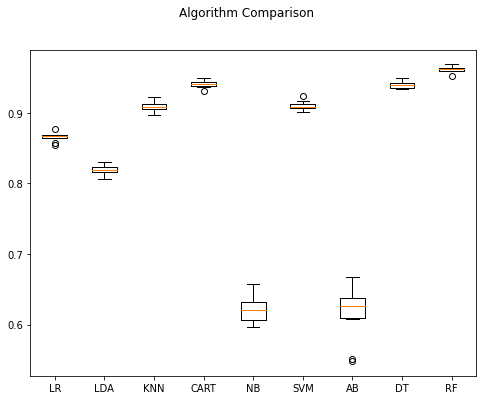

In [24]:
compareModels(accuracies, results, classifiers)

## Best is Random Forest 

In [1]:
def testBestModel(model, X_validation, Y_validation):
    Y_predictions = rf.predict(X_validation)
    print("Accuracy = {:.2f}".format(accuracy_score(Y_validation, Y_predictions)))
    print('Confusion Matrix:')
    print(confusion_matrix(Y_validation, Y_predictions))
    print('Classification Report:')
    print(classification_report(Y_validation, Y_predictions))
    return Y_predictions

In [2]:
# train the best model and find the validation accuracy
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, Y_train)
Y_predictions = testBestModel(rf, X_validation, Y_validation)

NameError: name 'RandomForestClassifier' is not defined

## Confusion matrix after Random Forest Classifier

In [27]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [28]:
label = 'URL_Type_obf_Type'
lblTypes = set(df1[label])
for lbl in lblTypes:
    print('| {} | {} |'.format(lbl, len(df1[df1[label] == lbl].index)))

| phishing | 4014 |
| malware | 4440 |
| benign | 2709 |
| spam | 5342 |
| Defacement | 2477 |


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

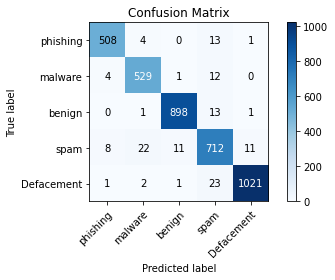

In [29]:
classes = lblTypes
np.set_printoptions(precision=2)
# plot non-normalized confusion matrix
plot_confusion_matrix(Y_validation, Y_predictions, classes=classes, 
                       title='Confusion Matrix')